# Predict Fare of Airlines Tickets Using Machine Learning

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data and Checking Head and Tail

In [2]:
train_data = pd.read_excel('./Data_Train.xlsx')

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Checking Data Types of the Columns in the Dataset

In [5]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


## Getting Info of train Dataset

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Calculating Null Values

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Inference: 
Route and Total_Stops have one one null values

## Checking, At which row feature 'Total_Stops' has null values

In [8]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

## Getting Row where the feature 'Total_Stops' is null

In [9]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## Dropping row where the feature 'Total_Stops' is null

In [10]:
train_data.dropna(inplace=True)

## Calculating null Values 

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Inference: **Now there is no null value in the dataset**

In [12]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [13]:
data = train_data.copy()

## Checking Datatype of feature 'Date_of_Journey'

In [14]:
type(data['Date_of_Journey'])

pandas.core.series.Series

## Defining function to convert the features from other datatype to datetime datatype

In [15]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_datetime(feature)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [20]:
data['Journey_day']=data['Date_of_Journey'].dt.day

In [21]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [22]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-25 05:50:00,2024-03-25 13:15:00,7h 25m,2 stops,No info,7662,1,5


In [23]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month'],
      dtype='object')

In [24]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [25]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [26]:
def extract_hour_minute(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)


In [27]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [28]:
extract_hour_minute(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-25 05:50:00,2024-03-25 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25


In [29]:
extract_hour_minute(data, 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-25 05:50:00,2024-03-25 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [30]:
cols_to_drop = ['Arrival_Time','Dep_Time']

In [31]:
data.drop(cols_to_drop, axis=1, inplace=True)

In [32]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [33]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [34]:
data.shape

(10682, 16)

In [35]:
def flight_departure_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif(x>12) and (x<=16):
        return "Afternoon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [36]:
data['Dep_Time_hour'].apply(flight_departure_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4            Afternoon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [37]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1040
Late Night        465
Name: count, dtype: int64

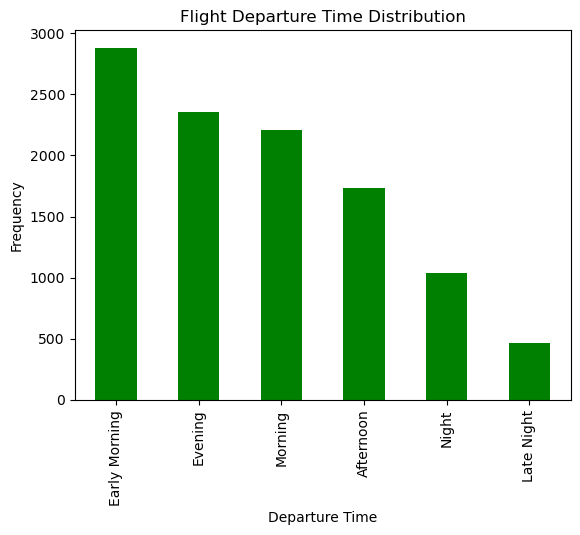

In [38]:
#data['Dep_Time_hour'].apply(flight_departure_time).value_counts().plot(kind='bar', color = 'green')
# Assuming data['Dep_Time_hour'].apply(flight_departure_time).value_counts() returns a pandas Series
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().plot(kind='bar', color='green')

# Add any necessary plot customizations (labels, titles, etc.)
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.title('Flight Departure Time Distribution')

# Save the plot as an image file
plt.savefig('./assets/flight_departure_time_distribution.png')

# Display the plot
plt.show()

In [39]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [40]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().iplot(kind='bar', color = 'green')

In [41]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [42]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [43]:
data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [44]:
data['Duration_hour'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [45]:
data['Duration_minute'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]) if len(x.split(' ')) > 1 else 0)


In [46]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0


In [47]:
data['Duration'].str.replace('h',"*60").str.replace(' ',"+").str.replace('m',"*1")

0        2*60+50*1
1        7*60+25*1
2            19*60
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680         3*60
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [48]:
data['Duration_in_min'] = data['Duration'].str.replace('h',"*60").str.replace(' ',"+").str.replace('m',"*1").apply(eval)

In [49]:
data['Duration_in_min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_in_min, Length: 10682, dtype: int64

In [50]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Duration_in_min'],
      dtype='object')

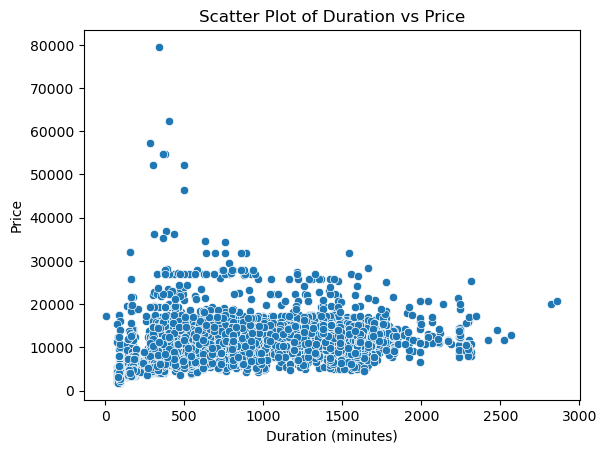

In [51]:

# Assuming 'data' is a DataFrame containing columns 'Duration_in_min' and 'Price'
sns.scatterplot(x='Duration_in_min', y='Price', data=data)

# Add any necessary plot customizations (labels, titles, etc.)
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Scatter Plot of Duration vs Price')

# Save the plot as an image file
plt.savefig('./assets/scatter_plot_duration_price.png')

# Display the plot
plt.show()

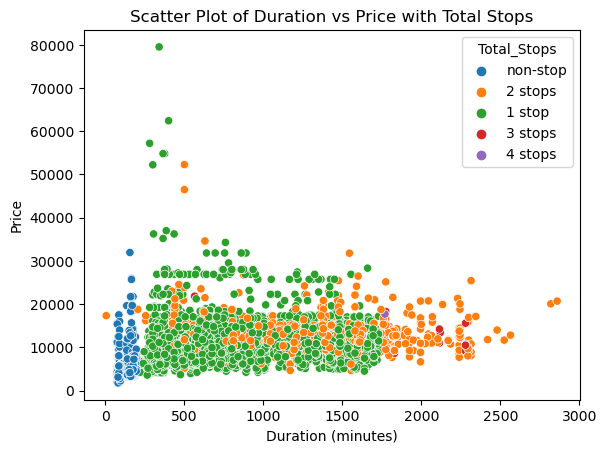

In [52]:
sns.scatterplot(x='Duration_in_min', y='Price', hue='Total_Stops', data=data)

# Add any necessary plot customizations (labels, titles, etc.)
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Scatter Plot of Duration vs Price with Total Stops')

# Save the plot as an image file
plt.savefig('./assets/scatter_plot_duration_price_with_total_stops.png')

# Display the plot
plt.show()

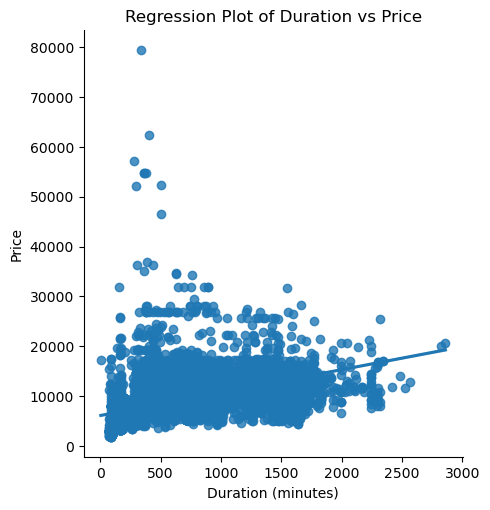

In [53]:
sns.lmplot(x='Duration_in_min', y='Price', data=data)

# Add any necessary plot customizations (labels, titles, etc.)
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Regression Plot of Duration vs Price')

# Save the plot as an image file
plt.savefig('./assets/lmplot_duration_price.png')

# Display the plot
plt.show()

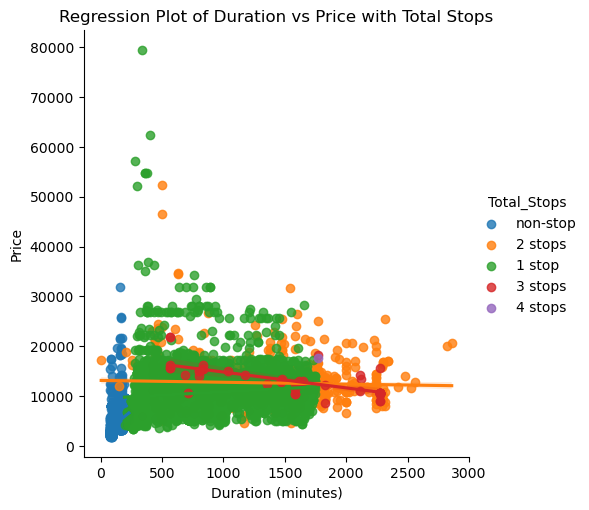

In [54]:
sns.lmplot(x='Duration_in_min', y='Price', hue='Total_Stops', data=data)

# Add any necessary plot customizations (labels, titles, etc.)
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Regression Plot of Duration vs Price with Total Stops')

# Save the plot as an image file
plt.savefig('./assets/lmplot_duration_price_with_total_stops.png')

# Display the plot
plt.show()

In [55]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Duration_in_min'],
      dtype='object')

In [56]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [57]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Duration_in_min'],
      dtype='object')

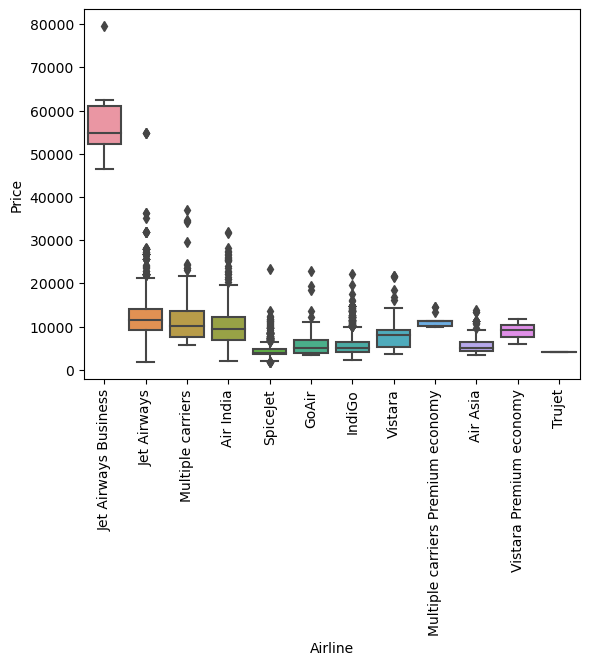

In [58]:
sns.boxplot(y='Price', x='Airline', data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.savefig('./assets/Airline Vs Price.png')
plt.show()

In [59]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Duration_in_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445


In [60]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Duration_in_min'],
      dtype='object')

In [61]:
cat_col = [col for col in data.columns if data[col].dtype=='object']

In [62]:
num_col = [col for col in data.columns if data[col].dtype!='object']

In [63]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [64]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [65]:
data['Source'].apply(lambda x: 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [66]:
for sub_category in data['Source'].unique():
    data["Source_" + sub_category]=data['Source'].apply(lambda x: 1 if x == sub_category else 0)

In [67]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Duration_in_min',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [68]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Duration_in_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [69]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [70]:
data['Airline'].nunique()

12

In [71]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [72]:
airline = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [73]:
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [74]:
dict_airline = {key:index for index, key in enumerate(airline,0)}

In [75]:
dict_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [76]:
data['Airline'] = data['Airline'].map(dict_airline)

In [77]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [78]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Duration_in_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [79]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [80]:
data['Destination'].nunique()

6

In [81]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [82]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [83]:
data['Destination'].nunique()

5

In [84]:
dest = airline = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [85]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [86]:
dict_dest = {key:index for index, key in enumerate(dest,0)}

In [87]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [88]:
data['Destination'] = data['Destination'].map(dict_dest)

In [89]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Duration_in_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [90]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [91]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [92]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [93]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [94]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Duration_in_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0


In [95]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Duration_in_min',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [96]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [97]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Duration_in_min',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  int64         
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  int64         
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  int64         
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Journey_day          10682 non-null  int32         
 10  Journey_month        10682 non-null  int32         
 11  Journey_year         10682 non-null  int32         
 12  Arrival_Time_hour    10682 non-null  int32         
 13  Arrival_Time_minute  10682 non-null 

In [99]:
data.drop(columns = ['Date_of_Journey','Additional_Info','Duration_in_min','Source'], inplace = True)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int64 
 1   Destination          10682 non-null  int64 
 2   Route                10682 non-null  object
 3   Duration             10682 non-null  object
 4   Total_Stops          10682 non-null  int64 
 5   Price                10682 non-null  int64 
 6   Journey_day          10682 non-null  int32 
 7   Journey_month        10682 non-null  int32 
 8   Journey_year         10682 non-null  int32 
 9   Arrival_Time_hour    10682 non-null  int32 
 10  Arrival_Time_minute  10682 non-null  int32 
 11  Dep_Time_hour        10682 non-null  int32 
 12  Dep_Time_minute      10682 non-null  int32 
 13  Duration_hour        10682 non-null  int64 
 14  Duration_minute      10682 non-null  int64 
 15  Source_Banglore      10682 non-null  int64 
 16  Source_Ko

In [101]:
data['Journey_year'].unique()

array([2019], dtype=int32)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int64 
 1   Destination          10682 non-null  int64 
 2   Route                10682 non-null  object
 3   Duration             10682 non-null  object
 4   Total_Stops          10682 non-null  int64 
 5   Price                10682 non-null  int64 
 6   Journey_day          10682 non-null  int32 
 7   Journey_month        10682 non-null  int32 
 8   Journey_year         10682 non-null  int32 
 9   Arrival_Time_hour    10682 non-null  int32 
 10  Arrival_Time_minute  10682 non-null  int32 
 11  Dep_Time_hour        10682 non-null  int32 
 12  Dep_Time_minute      10682 non-null  int32 
 13  Duration_hour        10682 non-null  int64 
 14  Duration_minute      10682 non-null  int64 
 15  Source_Banglore      10682 non-null  int64 
 16  Source_Ko

In [103]:
data.drop(columns = ['Journey_year'], inplace = True)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int64 
 1   Destination          10682 non-null  int64 
 2   Route                10682 non-null  object
 3   Duration             10682 non-null  object
 4   Total_Stops          10682 non-null  int64 
 5   Price                10682 non-null  int64 
 6   Journey_day          10682 non-null  int32 
 7   Journey_month        10682 non-null  int32 
 8   Arrival_Time_hour    10682 non-null  int32 
 9   Arrival_Time_minute  10682 non-null  int32 
 10  Dep_Time_hour        10682 non-null  int32 
 11  Dep_Time_minute      10682 non-null  int32 
 12  Duration_hour        10682 non-null  int64 
 13  Duration_minute      10682 non-null  int64 
 14  Source_Banglore      10682 non-null  int64 
 15  Source_Kolkata       10682 non-null  int64 
 16  Source_De

In [105]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [106]:
data.drop(columns = ['Route'], inplace = True)

In [107]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_minute', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int64 
 1   Destination          10682 non-null  int64 
 2   Duration             10682 non-null  object
 3   Total_Stops          10682 non-null  int64 
 4   Price                10682 non-null  int64 
 5   Journey_day          10682 non-null  int32 
 6   Journey_month        10682 non-null  int32 
 7   Arrival_Time_hour    10682 non-null  int32 
 8   Arrival_Time_minute  10682 non-null  int32 
 9   Dep_Time_hour        10682 non-null  int32 
 10  Dep_Time_minute      10682 non-null  int32 
 11  Duration_hour        10682 non-null  int64 
 12  Duration_minute      10682 non-null  int64 
 13  Source_Banglore      10682 non-null  int64 
 14  Source_Kolkata       10682 non-null  int64 
 15  Source_Delhi         10682 non-null  int64 
 16  Source_Ch

In [109]:
data.drop(columns = ['Duration'], inplace = True)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              10682 non-null  int64
 1   Destination          10682 non-null  int64
 2   Total_Stops          10682 non-null  int64
 3   Price                10682 non-null  int64
 4   Journey_day          10682 non-null  int32
 5   Journey_month        10682 non-null  int32
 6   Arrival_Time_hour    10682 non-null  int32
 7   Arrival_Time_minute  10682 non-null  int32
 8   Dep_Time_hour        10682 non-null  int32
 9   Dep_Time_minute      10682 non-null  int32
 10  Duration_hour        10682 non-null  int64
 11  Duration_minute      10682 non-null  int64
 12  Source_Banglore      10682 non-null  int64
 13  Source_Kolkata       10682 non-null  int64
 14  Source_Delhi         10682 non-null  int64
 15  Source_Chennai       10682 non-null  int64
 16  Source_Mumbai        10682 

In [111]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,13,15,5,50,7,25,0,1,0,0,0


In [112]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot( x = col , data = df , ax = ax2 )
    sns.distplot(df[col], ax=ax3, kde=False)
    # Save the plot as an image file
    plt.savefig('./assets/Price Vs Density.png')

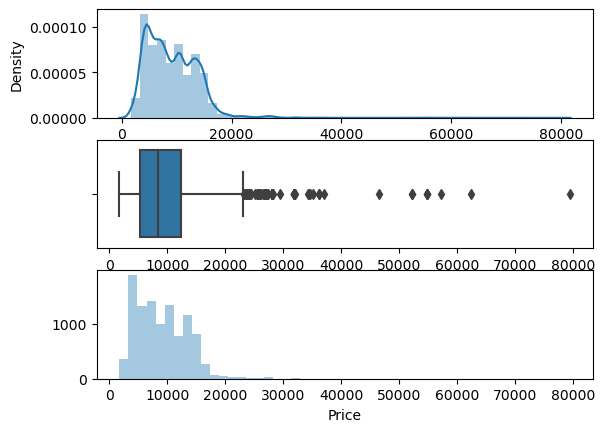

In [113]:
plot(data, 'Price')

In [114]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3-q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [115]:
print(maximum)

23017.0


In [116]:
print(minimum)

-5367.0


In [117]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [118]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [119]:
data['Price']=np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

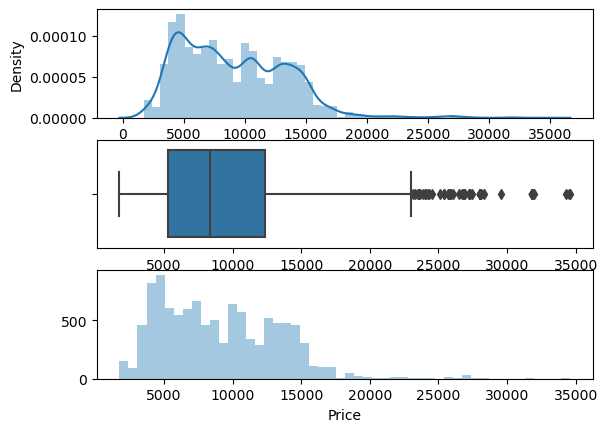

In [120]:
plot(data, 'Price')

In [121]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,13,15,5,50,7,25,0,1,0,0,0


In [122]:
x = data.drop(['Price'], axis=1)

In [123]:
x

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,12,5,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,1,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,22,25,19,55,2,30,0,1,0,0,0
10679,7,3,0,27,4,23,20,20,45,2,35,0,1,0,0,0
10680,10,2,0,27,4,11,20,8,20,3,0,1,0,0,0,0
10681,5,2,0,1,3,14,10,11,30,2,40,1,0,0,0,0


In [124]:
y = data['Price']

In [125]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [126]:
from sklearn.feature_selection import mutual_info_regression

In [127]:
imp = mutual_info_regression(x,y)

In [128]:
imp

array([0.96402071, 1.00432348, 0.7928222 , 0.23031971, 0.62916281,
       0.40538396, 0.35818124, 0.33155029, 0.25919385, 0.47892431,
       0.34347545, 0.39076957, 0.45572758, 0.51684966, 0.12118269,
       0.20024702])

In [129]:
imp_df = pd.DataFrame(imp, index = x.columns)

In [130]:
imp_df

,0
Airline,0.964021
Destination,1.004323
Total_Stops,0.792822
Journey_day,0.230320
Journey_month,0.629163
Arrival_Time_hour,0.405384
Arrival_Time_minute,0.358181
Dep_Time_hour,0.331550
Dep_Time_minute,0.259194
Duration_hour,0.478924


In [131]:
imp_df.columns = ['importance']

In [132]:
imp_df

,importance
Airline,0.964021
Destination,1.004323
Total_Stops,0.792822
Journey_day,0.230320
Journey_month,0.629163
Arrival_Time_hour,0.405384
Arrival_Time_minute,0.358181
Dep_Time_hour,0.331550
Dep_Time_minute,0.259194
Duration_hour,0.478924


In [133]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Destination,1.004323
Airline,0.964021
Total_Stops,0.792822
Journey_month,0.629163
Source_Delhi,0.516850
Duration_hour,0.478924
Source_Kolkata,0.455728
Arrival_Time_hour,0.405384
Source_Banglore,0.390770
Arrival_Time_minute,0.358181


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
ml_model = RandomForestRegressor()

In [138]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
y_pred = ml_model.predict(X_test)

In [140]:
y_pred

array([16767.83 ,  5303.81 ,  8957.98 , ...,  7990.95 ,  8739.83 ,
       12048.191])

In [141]:
from sklearn import metrics

In [142]:
metrics.r2_score(y_test, y_pred)

0.8159596642506972

In [143]:
import pickle

In [144]:
file = open('./rf_random.pkl','wb')

In [145]:
pickle.dump(ml_model, file)

In [146]:
model = open('./rf_random.pkl','rb')

In [147]:
forest = pickle.load(model)

In [148]:
y_pred2 = forest.predict(X_test)

In [149]:
metrics.r2_score(y_test, y_pred2)

0.8159596642506972

In [150]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [151]:
mape(y_test,y_pred)

13.214273477373547

In [152]:
from sklearn import metrics

In [153]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print("Training Score : {}".format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print("Predictions are : {}".format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('Root Mean Square Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('Mean Absolute Percentage Error: {}'.format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)
    plt.savefig('./assets/Price Vs Density_RandomForestRegressor.png')


Training Score : 0.953565545021147
Predictions are : [16764.54    5367.27    8909.2    ...  8246.15    8977.07   12006.9745]


r2 score: 0.8141845823115816
Mean Absolute Error: 1173.4443209664305
Mean Squared Error: 3568347.301956781
Root Mean Square Error: 1889.0069618603266
Mean Absolute Percentage Error: 13.234029965107874


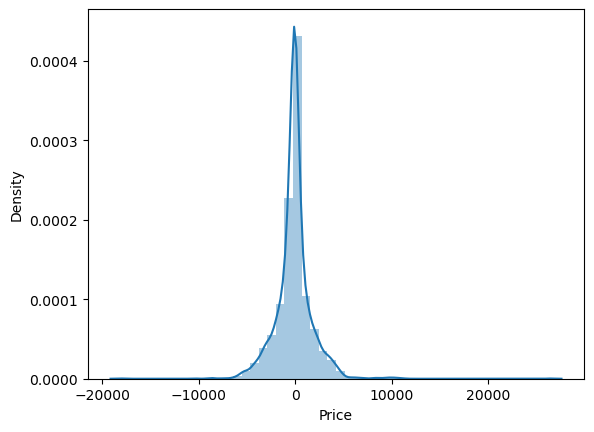

In [154]:
predict(RandomForestRegressor())

In [155]:
from sklearn.tree import DecisionTreeRegressor

Training Score : 0.9696998040730191
Predictions are : [16840.   4959.   8085.  ...  6442.  10141.  11652.5]


r2 score: 0.6965121398557038
Mean Absolute Error: 1381.4101247872943
Mean Squared Error: 5828095.9696168145
Root Mean Square Error: 2414.144976925954
Mean Absolute Percentage Error: 15.421942339465414


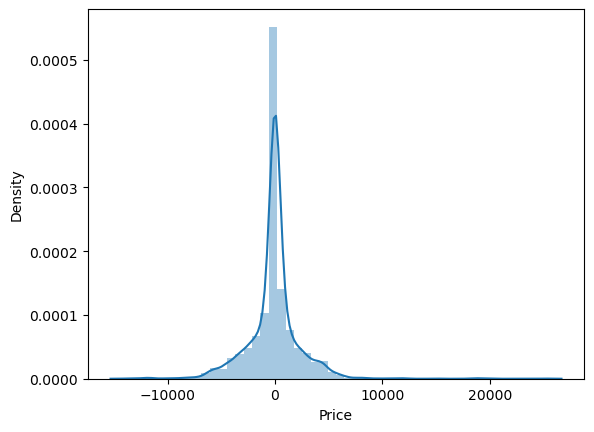

In [156]:
predict(DecisionTreeRegressor())
plt.savefig('./assets/Price Vs Density_DecisonTreeRegressor.png')

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [158]:
reg_rf = RandomForestRegressor()

In [159]:
np.linspace(start = 100, stop = 1200, num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [160]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]

In [161]:
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]
min_samples_split = [5,10,15,100]

In [162]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [163]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [164]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [165]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [166]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 21}

In [167]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=10,
                      n_estimators=980)

In [168]:
rf_random.best_score_

0.797282965966284

## <div style="text-align: left"> - Paras Agrawal </div>
##### <div style="text-align: left"> Undergrad at Vellore Institute of Technology, Vellore </div>
##### <div style="text-align: left"> Computer Science and Engineering with Specialization in Information Security </div>